# Mount Google Drive, Import necessary libraries

In [ ]:
import os
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


Mounted at /content/drive


# Load the CSV file from Google Drive
# Basic info

In [ ]:
# Load the CSV file from Google Drive
file_path = '/../data/masaustu_data_kaggle.csv'  # <<-- update path if needed
df = pd.read_csv(file_path)

# Basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       2467 non-null   object 
 1   Price                       2467 non-null   float64
 2   Processor Type              2462 non-null   object 
 3   SSD Capacity                2266 non-null   object 
 4   RAM (System Memory)         2267 non-null   object 
 5   Graphics Card               2462 non-null   object 
 6   Graphics Card Capacity      2462 non-null   object 
 7   Operating System            2462 non-null   object 
 8   Graphics Card Memory Type   2461 non-null   object 
 9   Graphics Card Type          2432 non-null   object 
 10  Warranty Type               2463 non-null   object 
 11  RAM (System Memory) Type    2327 non-null   object 
 12  Processor Core Count        2432 non-null   object 
 13  Processor Generation        2449 

,Brand,Price,Processor Type,SSD Capacity,RAM (System Memory),Graphics Card,Graphics Card Capacity,Operating System,Graphics Card Memory Type,Graphics Card Type,...,GPU Memory,Base Processor Speed (GHz),Connections,Device Weight,Screen Size,Processor Frequency,Screen Refresh Rate,Panel Type,Country of Origin,Maximum Expandable Memory
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,...,4 GB ve altı,3.2,HDMI,Belirtilmemiş,24 inç,3.00 GHz üstü,75 Hz,NaN,NaN,NaN
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DMC,20799.00,Intel Core i5,256 GB,32 GB,AMD Radeon RX 580,256 GB,Windows,GDDR5,Harici,...,8 GB,2.9,HDMI,Belirtilmemiş,"24"" / 61 Ekran",NaN,165 Hz,VA,TR,NaN
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check missing values

In [ ]:

df.isnull().sum()


,0
Brand,0
Price,0
Processor Type,5
SSD Capacity,201
RAM (System Memory),200
Graphics Card,5
Graphics Card Capacity,5
Operating System,5
Graphics Card Memory Type,6
Graphics Card Type,35


In [ ]:

for col in df.columns:
    print(f"\n--- Column: {col} ---")
    print(df[col].describe(include='all'))
    print("Missing Values:", df[col].isnull().sum())



--- Column: Brand ---
count     2467
unique      52
top       ACER
freq       964
Name: Brand, dtype: object
Missing Values: 0

--- Column: Price ---
count      2467.000000
mean      33466.477588
std       19139.025761
min        2649.000000
25%       26188.060000
50%       33016.470000
75%       39425.535000
max      380353.350000
Name: Price, dtype: float64
Missing Values: 0

--- Column: Processor Type ---
count              2462
unique               13
top       Intel Core i5
freq               1538
Name: Processor Type, dtype: object
Missing Values: 5

--- Column: SSD Capacity ---
count     2266
unique      14
top       4 TB
freq       607
Name: SSD Capacity, dtype: object
Missing Values: 201

--- Column: RAM (System Memory) ---
count      2267
unique       15
top       16 GB
freq        376
Name: RAM (System Memory), dtype: object
Missing Values: 200

--- Column: Graphics Card ---
count                 2462
unique                  50
top       AMD Radeon RX550
freq               

# Drop columns with >70% missing values
# Fill remaining missing values

In [ ]:

missing_threshold = 0.7
drop_cols = df.columns[df.isnull().mean() > missing_threshold]
print("Dropping columns:", list(drop_cols))
df.drop(columns=drop_cols, inplace=True)


for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


Dropping columns: ['Resolution', 'Power Supply', 'Device Weight', 'Processor Frequency', 'Screen Refresh Rate', 'Panel Type', 'Country of Origin']


<ipython-input-5-2e2d89cf46df>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
<ipython-input-5-2e2d89cf46df>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

# Check missing values after dropping and filling


In [ ]:
df.isnull().sum()

,0
Brand,0
Price,0
Processor Type,0
SSD Capacity,0
RAM (System Memory),0
Graphics Card,0
Graphics Card Capacity,0
Operating System,0
Graphics Card Memory Type,0
Graphics Card Type,0


# Explore each column in detail

In [ ]:

for col in df.columns:
    print(f"\n--- Column: {col} ---")
    print(df[col].describe(include='all'))
    print("Missing Values:", df[col].isnull().sum())



--- Column: Brand ---
count     2467
unique      52
top       ACER
freq       964
Name: Brand, dtype: object
Missing Values: 0

--- Column: Price ---
count      2467.000000
mean      33466.477588
std       19139.025761
min        2649.000000
25%       26188.060000
50%       33016.470000
75%       39425.535000
max      380353.350000
Name: Price, dtype: float64
Missing Values: 0

--- Column: Processor Type ---
count              2467
unique               14
top       Intel Core i5
freq               1538
Name: Processor Type, dtype: object
Missing Values: 0

--- Column: SSD Capacity ---
count     2467
unique      15
top       4 TB
freq       607
Name: SSD Capacity, dtype: object
Missing Values: 0

--- Column: RAM (System Memory) ---
count      2467
unique       16
top       16 GB
freq        376
Name: RAM (System Memory), dtype: object
Missing Values: 0

--- Column: Graphics Card ---
count                 2467
unique                  51
top       AMD Radeon RX550
freq                   

# Explore each column in detail

In [ ]:

data = {}
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"\n--- Column: {col} ---")
    unique = []
    for i in df[col]:
        if i not in unique:
            unique.append(i)
    data[col] = unique
    print(f"Unique values: {unique}")
data_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in data.items()])) # Create a DataFrame from dictionary, allowing for varying lengths
data_df.to_csv('unique.csv', index=False) # Save to CSV, optionally excluding index


--- Column: Brand ---
Unique values: ['XASER', 'DMC', 'Zeiron', 'jetucuzal', 'Life Teknoloji', 'IZOLY', 'TURBOX', 'Super', 'RAMTECH', 'Gamepage', 'Apple', 'GAMELİNE', 'MSI', 'METSA', 'PCDEPO', 'Quantum Gaming', 'Canar', 'Gigabyte', 'ROGAME', 'LENOVO', 'EFS TEKNOLOJİ', 'HP', 'OEM', 'ASUS', 'OXpower', 'ARTITEKNİKPC', 'TOPLAMA', 'Güneysu Gaming', 'CASPER', 'UCARTECH', 'Technopc', 'DAGMOR', 'WARBOX', 'Avantron', 'Revenge', 'ColdPower', 'SECLIFE', 'TRİNİTY', 'Zetta', 'Corsair', 'RaXius', 'Oksid Bilişim Teknoloji', 'Tiwox', 'Jedi', 'Dell', 'Quadro', 'Rexdragon', 'Grundig', 'Redrock', 'Gaming Game', 'ACER', 'Tiranozor']

--- Column: Processor Type ---
Unique values: ['Intel Core i5', 'Unknown', 'Intel Core i7', 'AMD', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Ryzen 9', 'M2', 'Apple M1', 'Intel Pentium', 'AMD Ryzen 7', 'Intel Xeon', 'Intel Core i9', 'AMD Ryzen 3']

--- Column: SSD Capacity ---
Unique values: ['512 GB', '256 GB', 'Unknown', '240 GB', '1 TB', '128 GB', 'SSD Yok', '500 GB', '4 TB', '

# Define the mapping for Turkish to English

In [ ]:

brand_mapping = {
    'Life Teknoloji': 'Life Technology',
    'GAMELİNE': 'GAMELINE',
    'EFS TEKNOLOJİ': 'EFS TECHNOLOGY',
    'ARTITEKNİKPC': 'ARTITEKNIKPC',
    'TOPLAMA': 'Assembly',
    'Güneysu Gaming': 'Güneysu Gaming',
    'Oksid Bilişim Teknoloji': 'Oksid Information Technology',
    'TRİNİTY': 'TRINITY',
}

# Apply the mapping to the 'Brand' column
df['Brand'] = df['Brand'].replace(brand_mapping)

# Check the updated 'Brand' column
df['Brand'].unique()


array(['XASER', 'DMC', 'Zeiron', 'jetucuzal', 'Life Technology', 'IZOLY',
       'TURBOX', 'Super', 'RAMTECH', 'Gamepage', 'Apple', 'GAMELINE',
       'MSI', 'METSA', 'PCDEPO', 'Quantum Gaming', 'Canar', 'Gigabyte',
       'ROGAME', 'LENOVO', 'EFS TECHNOLOGY', 'HP', 'OEM', 'ASUS',
       'OXpower', 'ARTITEKNIKPC', 'Assembly', 'Güneysu Gaming', 'CASPER',
       'UCARTECH', 'Technopc', 'DAGMOR', 'WARBOX', 'Avantron', 'Revenge',
       'ColdPower', 'SECLIFE', 'TRINITY', 'Zetta', 'Corsair', 'RaXius',
       'Oksid Information Technology', 'Tiwox', 'Jedi', 'Dell', 'Quadro',
       'Rexdragon', 'Grundig', 'Redrock', 'Gaming Game', 'ACER',
       'Tiranozor'], dtype=object)

# Define the mapping for Turkish SSD capacity terms to English

In [ ]:

ssd_capacity_mapping = {
    'SSD Yok': '0 GB',
    '1 TB': '1024 GB',
    '2 TB': '2048 GB',
    '4 TB': '4096 GB',
}

# Apply the mapping to the 'SSD Capacity' column
df['SSD Capacity'] = df['SSD Capacity'].replace(ssd_capacity_mapping)
# Check the updated 'SSD Capacity' column
df['SSD Capacity'].unique()


array(['512 GB', '256 GB', 'Unknown', '240 GB', '1024 GB', '128 GB',
       '0 GB', '500 GB', '4096 GB', '480 GB', '250 GB', '32 GB', '8 GB',
       '2048 GB', '120 GB'], dtype=object)

# Define the mapping for Turkish Graphics Card term to English

In [ ]:

graphics_card_mapping = {
    'Dahili Ekran Kartı': 'Integrated Graphics',
    'AMD CPU Entegre Grafik': 'AMD Integrated Graphics',
    'Belirtilmemiş': 'Unknown'
}

# Apply the mapping to the 'Graphics Card' column
df['Graphics Card'] = df['Graphics Card'].replace(graphics_card_mapping)
# Check the updated 'Graphics Card' column
df['Graphics Card'].unique()


array(['AMD Radeon RX 550', 'Nvidia Geforce GT 740', 'AMD Radeon RX 580',
       'Unknown', 'Intel HD Graphics', 'Nvidia GeForce GTX 1650',
       'Integrated Graphics', 'Nvidia GeForce RTX 3050',
       'AMD Radeon RX 560', 'Nvidia GeForce GT 730', 'AMD Radeon R7 240',
       'Intel Iris Graphics', 'AMD Radeon R5 230',
       'Intel UHD Graphics 600', 'Nvidia GeForce GTX 1660 SUPER',
       'Nvidia GeForce RTX 4070Ti SUPER', 'Nvidia GeForce RTX3060',
       'Nvidia GeForce RTX 4060Ti', 'Nvidia GeForce GTX1050 Ti',
       'Nvidia GeForce RTX 4070', 'Intel UHD Graphics 730',
       'AMD Integrated Graphics', 'Nvidia Geforce GT 710',
       'Nvidia GeForce RTX 4070Ti', 'Intel UHD Graphics 770',
       'Nvidia GeForce RTX 4090Ti', 'AMD Radeon Graphics',
       'AMD Radeon R5', 'Nvidia GeForce RTX 4060', 'AMD Radeon RX 550X',
       'Intel UHD Graphics 630', 'Nvidia GeForce RTX 3080',
       'Nvidia GeForce MX110', 'AMD Radeon RX550',
       'Nvidia GeForce RTX 3070', 'Intel HD Graphics 55

# Define the mapping for Turkish Graphics Card Capacity terms to English

In [ ]:

graphics_card_capacity_mapping = {
    'Yok': np.nan,
    'Belirtilmemiş': np.nan,
    '1 TB': '1024 GB',
    '2 TB': '2048 GB',
    '3 TB': '3072 GB',
    '4 TB': '4096 GB',
    '5 TB': '5120 GB',
}

# Apply the mapping to the 'Graphics Card Capacity' column
df['Graphics Card Capacity'] = df['Graphics Card Capacity'].replace(graphics_card_capacity_mapping)
# Check the updated 'Graphics Card Capacity' column
df['Graphics Card Capacity'].unique()


array(['512 GB', nan, '256 GB', '1024 GB', '500 GB', 'Unknown', '8 GB',
       '128 GB', '320 GB', '5120 GB', '64 GB', '250 GB', '16 GB',
       '4096 GB', '2048 GB', '3072 GB'], dtype=object)

# Define the mapping for Turkish Operating System terms to English

In [ ]:

operating_system_mapping = {
    'Free Dos (İşletim Sistemi Yok)': 'Free Dos (No Operating System)',
    'Belirtilmemiş': np.nan
}

# Apply the mapping to the 'Operating System' column
df['Operating System'] = df['Operating System'].replace(operating_system_mapping)
# Check the updated 'Operating System' column
df['Operating System'].unique()


array(['Free Dos (No Operating System)', 'Windows', 'Unknown', nan,
       'Mac Os', 'Ubuntu', 'Linux'], dtype=object)

# Define the mapping for Turkish Graphics Card Memory Type terms to English

In [ ]:

graphics_card_memory_type_mapping = {
    'Dahili': 'Integrated',
    'Belirtilmemiş': np.nan
}

# Apply the mapping to the 'Graphics Card Memory Type' column
df['Graphics Card Memory Type'] = df['Graphics Card Memory Type'].replace(graphics_card_memory_type_mapping)
# Check the updated 'Graphics Card Memory Type' column
df['Graphics Card Memory Type'].unique()


array(['GDDR5', 'DDR3', 'Unknown', 'Integrated', 'GDDR6', 'DDR', nan,
       'DDR5', 'DDR4', 'GDDR6X', 'GDDR5X', 'SD', 'DDR2 + DDR3'],
      dtype=object)

# Define the mapping for Turkish Graphics Card Type terms to English

In [ ]:

graphics_card_type_mapping = {
    'Harici': 'External',
    'Dahili': 'Integrated',
    'Belirtilmemiş': np.nan
}

# Apply the mapping to the 'Graphics Card Type' column
df['Graphics Card Type'] = df['Graphics Card Type'].replace(graphics_card_type_mapping)
# Check the updated 'Graphics Card Type' column
df['Graphics Card Type'].unique()


array(['External', 'Unknown', 'Integrated', nan], dtype=object)

# Define the mapping for Turkish Warranty Type terms to English

In [ ]:

warranty_type_mapping = {
    'Resmi Distribütör Garantili': 'Official Distributor Warranty',
    'Zeiron TÃ¼rkiye Garantili': 'Zeiron Turkey Warranty',
    'Zeiron Türkiye Garantili': 'Zeiron Turkey Warranty',
    'İthalatçı Garantili': 'Importer Warranty',
    'İzoly Türkiye Garantisi': 'Izoly Turkey Warranty',
    'Apple Türkiye Garantili': 'Apple Turkey Warranty',
    'Technopc Türkiye Garantili': 'Technopc Turkey Warranty',
    'Lenovo Türkiye Garantili': 'Lenovo Turkey Warranty',
    'Apple TÃ¼rkiye Garantili': 'Apple Turkey Warranty',
    'Asus Türkiye Garantili': 'Asus Turkey Warranty',
    'HP Türkiye Garantili': 'HP Turkey Warranty',
    'ACER Türkiye Garantili': 'Acer Turkey Warranty',
    'Casper Türkiye Garantili': 'Casper Turkey Warranty',
    'Samsung TR Garantili': 'Samsung TR Warranty',
    'Belirtilmemiş': np.nan,
    'Dell Türkiye Garantili': 'Dell Turkey Warranty'
}

# Apply the mapping to the 'Warranty Type' column
df['Warranty Type'] = df['Warranty Type'].replace(warranty_type_mapping)
# Check the updated 'Warranty Type' column
df['Warranty Type'].unique()


array(['Official Distributor Warranty', 'Zeiron Turkey Warranty',
       'Importer Warranty', 'Unknown', 'Izoly Turkey Warranty',
       'Apple Turkey Warranty', 'Technopc Turkey Warranty',
       'Lenovo Turkey Warranty', 'Asus Turkey Warranty',
       'HP Turkey Warranty', 'Acer Turkey Warranty',
       'Casper Turkey Warranty', 'Samsung TR Warranty', nan,
       'Dell Turkey Warranty'], dtype=object)

# Define the mapping for Turkish RAM (System Memory) Type terms to English

In [ ]:

ram_type_mapping = {
    'Belirtilmemiş': np.nan,
    'DD2': 'DDR2'
}

# Apply the mapping to the 'RAM (System Memory) Type' column
df['RAM (System Memory) Type'] = df['RAM (System Memory) Type'].replace(ram_type_mapping)
# Check the updated 'RAM (System Memory) Type' column
df['RAM (System Memory) Type'].unique()


array(['DDR3', 'DDR4', 'Unknown', 'DDR5', nan, 'DDR2'], dtype=object)

# Define the mapping for Turkish Processor Core Count terms to English

In [ ]:

processor_core_count_mapping = {
    'Belirtilmemiş': np.nan
}

# Apply the mapping to the 'Processor Core Count' column
df['Processor Core Count'] = df['Processor Core Count'].replace(processor_core_count_mapping)
# Check the updated 'Processor Core Count' column
df['Processor Core Count'].unique()


array(['4', '6', 'Unknown', '8', '12+', '2', nan, '1', '24', '10', '16',
       '20', '14'], dtype=object)

# Define the mapping for Turkish Processor Generation terms to English

In [ ]:

processor_generation_mapping = {
    '3. Nesil': '3rd Generation',
    '4. Nesil': '4th Generation',
    '2. Nesil': '2nd Generation',
    '12. Nesil': '12th Generation',
    '7. Nesil': '7th Generation',
    '1. Nesil': '1st Generation',
    '5. Nesil': '5th Generation',
    '10. Nesil': '10th Generation',
    '11. Nesil': '11th Generation',
    '9. Nesil': '9th Generation',
    '14. Nesil': '14th Generation',
    '6. Nesil': '6th Generation',
    '13. Nesil': '13th Generation',
    '8. Nesil': '8th Generation',
    'Belirtilmemiş': np.nan,
    'Unknown': np.nan
}

# Apply the mapping to the 'Processor Generation' column
df['Processor Generation'] = df['Processor Generation'].replace(processor_generation_mapping)
# Check the updated 'Processor Generation' column
df['Processor Generation'].unique()


array(['3rd Generation', '4th Generation', nan, '2nd Generation',
       '12th Generation', '7th Generation', '1st Generation',
       '5th Generation', '10th Generation', '11th Generation',
       '9th Generation', '14th Generation', '6th Generation',
       '13th Generation', '8th Generation'], dtype=object)

# Define the mapping for Turkish Processor Model terms to English

In [ ]:

processor_model_mapping = {
    'İ5-3470': 'i5-3470',
    'Ryzen 5 5600': 'Ryzen 5 5600',
    'İ5-650': 'i5-650',
    'Belirtilmemiş': np.nan,
    'Unknown': np.nan
}

# Apply the mapping to the 'Processor Model' column
df['Processor Model'] = df['Processor Model'].replace(processor_model_mapping)
# Check the updated 'Processor Model' column
df['Processor Model'].unique()


array(['3470', 'i5-3470', '4590', '9400F', nan, '2400', '12400F', '860',
       '7400', 'Ryzen 5 5600', '3770', '2100', '3600', '4570', '300U',
       '2600', '10100F', '650', '5900X', '10400F', '7600X', '5500U',
       '12400', '4440', '7800X', '7500U', '9400', '3700U', '12700',
       '3220', 'i5-650', '7500', 'Xeon Silver 4214', '1000M', '10510U',
       '13700F', '4770', '14700KF', '12100', '13500', '4800HS', '9100T',
       '6006U', '3240', '13400F', '6400', '9900', '10100', '14700K',
       '3350P', '12500', '6100', '14900KF', '4405U', '10400', '530',
       '7100', '11400', '3500U', '4150', '2200', '12700F', '13400',
       '6600H', '8100', '13700', '12700K', '5300G', '4460', '5600H',
       '11700', '1235U', '8600K', '8400', '10700', '560M', '8700',
       '12600K', '13100', '14900K', 'E52683', '8650U', '6500'],
      dtype=object)

# Define the mapping for Turkish Usage Purpose terms to English

In [ ]:

usage_purpose_mapping = {
    'Oyun': 'Gaming',
    'Ofis - İş': 'Office - Work',
    'Ev - Okul': 'Home - School',
    'Tasarım': 'Design',
    'Unknown': np.nan
}

# Apply the mapping to the 'Usage Purpose' column
df['Usage Purpose'] = df['Usage Purpose'].replace(usage_purpose_mapping)
# Check the updated 'Usage Purpose' column
df['Usage Purpose'].unique()


array([nan, 'Gaming', 'Office - Work', 'Home - School', 'Design'],
      dtype=object)

# Define the mapping for Turkish GPU Memory terms to English

In [ ]:

gpu_memory_mapping = {
    '4 GB ve altı': '4 GB and below',
    'Paylaşımlı': 'Shared',
    'Unknown': np.nan
}

# Apply the mapping to the 'GPU Memory' column
df['GPU Memory'] = df['GPU Memory'].replace(gpu_memory_mapping)
# Check the updated 'GPU Memory' column
df['GPU Memory'].unique()


array([nan, '4 GB and below', '8 GB', 'Shared', '6 GB', '16 GB', '12 GB',
       '24 GB'], dtype=object)

# Define the mapping for Turkish Procesor speed terms to English

In [ ]:
processor_speed_mapping = {
    'Unknown': np.nan,
    '3-4': '3.5',
    '3 - 4': '3.5'

}

# Apply the mapping to the 'Processor Speed' column
df['Base Processor Speed (GHz)'] = df['Base Processor Speed (GHz)'].replace(processor_speed_mapping)
# Check the updated 'Processor Speed' column
df['Base Processor Speed (GHz)'].unique()

array([nan, '3.2', '2.9', '3.1', '2.5', '2.8', '3', '3.9', '3.6', '3.3',
       '3.4', '3.7', '4.4', '2.1', '1.7', '3.5', '2', '2.6', '1.8', '2.2',
       '2.7', '1.5', '2.4', '2.3', '5'], dtype=object)

# Define the mapping for 'Connections'

In [ ]:

connections_mapping = {
    'Unknown': np.nan,
    'VGA - HDMI': 'VGA to HDMI',
    'VGA - DVI - HDMI': 'VGA to DVI to HDMI',
    'HDMI - DP': 'HDMI to Display Port',
    'DVI - HDMI - DP': 'DVI to HDMI to Display Port',
    'VGA - DVI': 'VGA to DVI',
    'DVI - HDMI': 'DVI to HDMI'
}

# Apply the mapping to the 'Connections' column
df['Connections'] = df['Connections'].replace(connections_mapping)
# Check the updated 'Connections' column
df['Connections'].unique()


array([nan, 'HDMI', 'VGA to HDMI', 'Display Port', 'VGA to DVI to HDMI',
       'Kablo', 'HDMI to Display Port', 'VGA', 'Wi-Fi', 'Bluetooth',
       'DVI to HDMI to Display Port', 'USB', 'VGA to DVI', 'DVI to HDMI'],
      dtype=object)

# Define the mapping for 'Screen Size'

In [ ]:

screen_size_mapping = {
    'Unknown': np.nan,
    '24 inç': '24 inches',
    '24" / 61 Ekran': '24 inches',
    '19" / 48 Ekran': '19 inches',
    '5 - 5,5 inç': '5 to 5.5 inches',
    '22 - 24 inç': '22 to 24 inches',
    '5,5 - 6 inç': '5.5 to 6 inches',
    '23.8 inç': '23.8 inches',
    '27 inç': '27 inches',
    '22 inç': '22 inches',
    '21,5 inç': '21.5 inches',
    '18 - 21 inç': '18 to 21 inches',
    '20 inç': '20 inches',
    '6 inç ve altı': '6 inches or less'
}

# Apply the mapping to the 'Screen Size' column
df['Screen Size'] = df['Screen Size'].replace(screen_size_mapping)

# Check the updated 'Screen Size' column
df['Screen Size'].unique()


array([nan, '24 inches', '19 inches', '5 to 5.5 inches',
       '22 to 24 inches', '5.5 to 6 inches', '23.8 inches', '27 inches',
       '22 inches', '21.5 inches', '18 to 21 inches', '20 inches',
       '6 inches or less'], dtype=object)

In [ ]:
df['Price'] = df['Price'].replace('Unknown', np.nan)
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Processor Type'] = df['Processor Type'].replace('Unknown', np.nan)
df['Processor Type'] = df['Processor Type'].fillna(df['Processor Type'].mode()[0])
df['RAM (System Memory)'] = df['RAM (System Memory)'].replace('Unknown', np.nan)
df['RAM (System Memory)'] = df['RAM (System Memory)'].fillna(df['RAM (System Memory)'].mode()[0])
df['RAM (System Memory) Type'] = df['RAM (System Memory) Type'].dropna
df['SSD Capacity'] = df['SSD Capacity'].replace('Unknown', np.nan)
df['SSD Capacity'] = df['SSD Capacity'].fillna(df['SSD Capacity'].mode()[0])
df['Graphics Card Capacity'] = df['Graphics Card Capacity'].replace('Unknown', np.nan)
df['Graphics Card Capacity'] = df['Graphics Card Capacity'].fillna(df['Graphics Card Capacity'].mode()[0])
df['GPU Memory'] = df['GPU Memory'].replace('Unknown', np.nan)
df['GPU Memory'] = df['GPU Memory'].fillna(df['GPU Memory'].mode()[0])
df['Maximum Expandable Memory'] = df['Maximum Expandable Memory'].replace('Unknown', np.nan)
df['Maximum Expandable Memory'] = df['Maximum Expandable Memory'].fillna(df['Maximum Expandable Memory'].mode()[0])
df['Screen Size'] = df['Screen Size'].replace('Unknown', np.nan)
df['Screen Size'] = df['Screen Size'].fillna(df['Screen Size'].mode()[0])
df['Processor Core Count'] = df['Processor Core Count'].replace('Unknown', np.nan)
df['Processor Core Count'] = df['Processor Core Count'].fillna(df['Processor Core Count'].mode()[0])
df['Processor Generation'] = df['Processor Generation'].replace('Unknown', np.nan)
df['Processor Generation'] = df['Processor Generation'].fillna(df['Processor Generation'].mode()[0])
df['Processor Model'] = df['Processor Model'].replace('Unknown', np.nan)
df['Processor Model'] = df['Processor Model'].fillna(df['Processor Model'].mode()[0])
df['Usage Purpose'] = df['Usage Purpose'].replace('Unknown', np.nan)
df['Usage Purpose'] = df['Usage Purpose'].fillna(df['Usage Purpose'].mode()[0])
df['Warranty Type'] = df['Warranty Type'].replace('Unknown', np.nan)
df['Warranty Type'] = df['Warranty Type'].fillna(df['Warranty Type'].mode()[0])
df['Graphics Card Type'] = df['Graphics Card Type'].replace('Unknown', np.nan)
df['Graphics Card Type'] = df['Graphics Card Type'].fillna(df['Graphics Card Type'].mode()[0])
df['Graphics Card Memory Type'] = df['Graphics Card Memory Type'].replace('Unknown', np.nan)
df['Graphics Card Memory Type'] = df['Graphics Card Memory Type'].fillna(df['Graphics Card Memory Type'].mode()[0])
df['Graphics Card'] = df['Graphics Card'].replace('Unknown', np.nan)
df['Graphics Card'] = df['Graphics Card'].fillna(df['Graphics Card'].mode()[0])
df['Operating System'] = df['Operating System'].replace('Unknown', np.nan)
df['Operating System'] = df['Operating System'].fillna(df['Operating System'].mode()[0])
df['Base Processor Speed (GHz)'] = df['Base Processor Speed (GHz)'].replace('Unknown', np.nan)
df['Base Processor Speed (GHz)'] = df['Base Processor Speed (GHz)'].fillna(df['Base Processor Speed (GHz)'].mode()[0])
df['Connections'] = df['Connections'].replace('Unknown', np.nan)
df['Connections'] = df['Connections'].fillna(df['Connections'].mode()[0])

# or df.isnull().sum()

In [ ]:
df.isna().sum()

,0
Brand,0
Price,0
Processor Type,0
SSD Capacity,0
RAM (System Memory),0
Graphics Card,0
Graphics Card Capacity,0
Operating System,0
Graphics Card Memory Type,0
Graphics Card Type,0


In [ ]:

df = df[df['Base Processor Speed (GHz)'] != 'Unknown']

# Extract numeric parts from text fields

In [ ]:

def extract_number(text):
    if pd.isnull(text)or text == 'Unknown':
        return text
    numbers = re.findall(r"\d+\.?\d*", str(text))
    return float(numbers[0]) if numbers else np.nan

# Columns that contain numeric values inside text
numeric_columns = ['Base Processor Speed (GHz)']

# Apply extraction
for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].apply(extract_number)



In [ ]:
# prompt: code to show datatype of all colmns

# Display data types of all columns
df.dtypes


,0
Brand,object
Price,float64
Processor Type,object
SSD Capacity,object
RAM (System Memory),object
Graphics Card,object
Graphics Card Capacity,object
Operating System,object
Graphics Card Memory Type,object
Graphics Card Type,object


# Explore each column in detail after translation mapping

In [ ]:

data = {}
for col in df.columns:
  if col != "Price":
    print(f"\n--- Column: {col} ---")
    unique = []
    for i in df[col]:
        if i not in unique:
            unique.append(i)
    data[col] = unique
    print(f"Unique values: {unique}")
data_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in data.items()])) # Create a DataFrame from dictionary, allowing for varying lengths
data_df.to_csv('uniqueng.csv', index=False) # Save to CSV, optionally excluding index


--- Column: Brand ---
Unique values: ['XASER', 'DMC', 'Zeiron', 'jetucuzal', 'Life Technology', 'IZOLY', 'TURBOX', 'Super', 'RAMTECH', 'Gamepage', 'Apple', 'GAMELINE', 'MSI', 'METSA', 'PCDEPO', 'Quantum Gaming', 'Canar', 'Gigabyte', 'ROGAME', 'LENOVO', 'EFS TECHNOLOGY', 'HP', 'OEM', 'ASUS', 'OXpower', 'ARTITEKNIKPC', 'Assembly', 'Güneysu Gaming', 'CASPER', 'UCARTECH', 'Technopc', 'DAGMOR', 'WARBOX', 'Avantron', 'Revenge', 'ColdPower', 'SECLIFE', 'TRINITY', 'Zetta', 'Corsair', 'RaXius', 'Oksid Information Technology', 'Tiwox', 'Jedi', 'Dell', 'Quadro', 'Rexdragon', 'Grundig', 'Redrock', 'Gaming Game', 'ACER', 'Tiranozor']

--- Column: Processor Type ---
Unique values: ['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Ryzen 9', 'M2', 'Apple M1', 'Intel Pentium', 'AMD Ryzen 7', 'Intel Xeon', 'Intel Core i9', 'AMD Ryzen 3']

--- Column: SSD Capacity ---
Unique values: ['512 GB', '256 GB', '4096 GB', '240 GB', '1024 GB', '128 GB', '0 GB', '500 GB', '480 GB', '2

# Drop rows where 'Base Processor Speed (GHz)' is 'Unknown'

# Function to print boxplot statistics

In [ ]:

def boxplot_details(series, col_name):
    if series.dropna().empty:
        print(f"\n{col_name}: No data available.")
        return

    desc = series.describe()
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = series[(series < lower_fence) | (series > upper_fence)]

    print(f"\nBoxplot details for '{col_name}':")
    print(f"  Count: {desc['count']}")
    print(f"  Min: {desc['min']}")
    print(f"  Q1 (25%): {Q1}")
    print(f"  Median (50%): {desc['50%']}")
    print(f"  Q3 (75%): {Q3}")
    print(f"  Max: {desc['max']}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Fence: {lower_fence}")
    print(f"  Upper Fence: {upper_fence}")
    print(f"  Number of outliers: {outliers.count()}")

# Apply to selected columns
for col in ['Price', 'Base Processor Speed (GHz)']:
    if col in df.columns:
        boxplot_details(df[col], col)



Boxplot details for 'Price':
  Count: 2467.0
  Min: 2649.0
  Q1 (25%): 26188.059999999998
  Median (50%): 33016.47
  Q3 (75%): 39425.535
  Max: 380353.35
  IQR: 13237.475000000006
  Lower Fence: 6331.847499999989
  Upper Fence: 59281.74750000001
  Number of outliers: 136

Boxplot details for 'Base Processor Speed (GHz)':
  Count: 2467.0
  Min: 1.5
  Q1 (25%): 1.8
  Median (50%): 1.8
  Q3 (75%): 1.8
  Max: 5.0
  IQR: 0.0
  Lower Fence: 1.8
  Upper Fence: 1.8
  Number of outliers: 674


# Plot boxplots before outlier removal

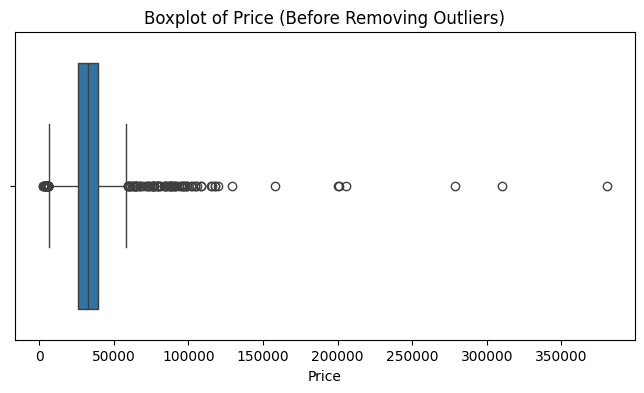

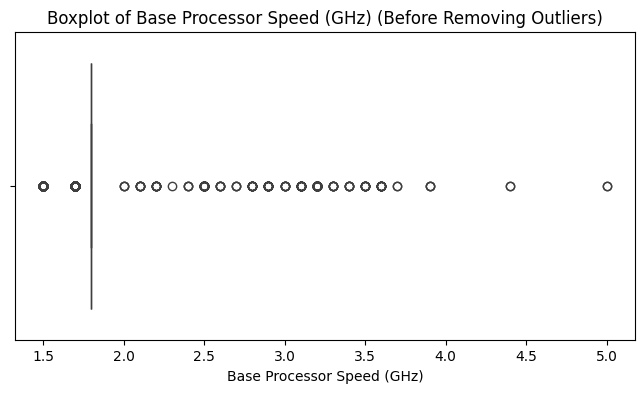

In [ ]:

for col in ['Price', 'Base Processor Speed (GHz)']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col} (Before Removing Outliers)")
        plt.show()

# Function to remove outliers

In [ ]:
"""
continuous_cols = ['Price', 'Base Processor Speed (GHz)']
ordinal_like_cols = ['RAM (System Memory)', 'SSD Capacity', 'Screen Size']

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    # Remove outliers
    return df[(df[col] >= lower_fence) & (df[col] <= upper_fence)]

# Make a copy to preserve original
clean_df = df.copy()

# Apply IQR filtering only on continuous columns
for col in continuous_cols:
    if col in clean_df.columns:
        clean_df = remove_outliers_iqr(clean_df, col)

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", clean_df.shape)"""

'\ncontinuous_cols = [\'Price\', \'Base Processor Speed (GHz)\']\nordinal_like_cols = [\'RAM (System Memory)\', \'SSD Capacity\', \'Screen Size\']\n\ndef remove_outliers_iqr(df, col):\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_fence = Q1 - 1.5 * IQR\n    upper_fence = Q3 + 1.5 * IQR\n    # Remove outliers\n    return df[(df[col] >= lower_fence) & (df[col] <= upper_fence)]\n\n# Make a copy to preserve original\nclean_df = df.copy()\n\n# Apply IQR filtering only on continuous columns\nfor col in continuous_cols:\n    if col in clean_df.columns:\n        clean_df = remove_outliers_iqr(clean_df, col)\n\nprint("Original dataset shape:", df.shape)\nprint("Cleaned dataset shape:", clean_df.shape)'

#capping outliers


In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)
    return df

# Apply to continuous numerical columns only
for col in ['Price', 'Base Processor Speed (GHz)']:
    if col in df.columns:
        df = cap_outliers(df, col)

print("Dataset shape after capping:", df.shape)


Dataset shape after capping: (2467, 21)


In [ ]:
# prompt: save the df to csv

df.to_csv('/../data/cleaned_masaustu_data.csv', index=False)
print("Cleaned dataframe saved.")

Cleaned dataframe saved to Google Drive.


In [ ]:
def boxplot_details(series, col_name):
    if series.dropna().empty:
        print(f"\n{col_name}: No data available.")
        return

    desc = series.describe()
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = series[(series < lower_fence) | (series > upper_fence)]

    print(f"\nBoxplot details for '{col_name}':")
    print(f"  Count: {desc['count']}")
    print(f"  Min: {desc['min']}")
    print(f"  Q1 (25%): {Q1}")
    print(f"  Median (50%): {desc['50%']}")
    print(f"  Q3 (75%): {Q3}")
    print(f"  Max: {desc['max']}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Fence: {lower_fence}")
    print(f"  Upper Fence: {upper_fence}")
    print(f"  Number of outliers: {outliers.count()}")

# Apply to selected columns
for col in ['Price', 'Base Processor Speed (GHz)']:
    if col in df.columns:
        boxplot_details(df[col], col)


Boxplot details for 'Price':
  Count: 2467.0
  Min: 6331.847499999989
  Q1 (25%): 26188.059999999998
  Median (50%): 33016.47
  Q3 (75%): 39425.535
  Max: 59281.74750000001
  IQR: 13237.475000000006
  Lower Fence: 6331.847499999989
  Upper Fence: 59281.74750000001
  Number of outliers: 0

Boxplot details for 'Base Processor Speed (GHz)':
  Count: 2467.0
  Min: 1.8
  Q1 (25%): 1.8
  Median (50%): 1.8
  Q3 (75%): 1.8
  Max: 1.8
  IQR: 0.0
  Lower Fence: 1.8
  Upper Fence: 1.8
  Number of outliers: 0


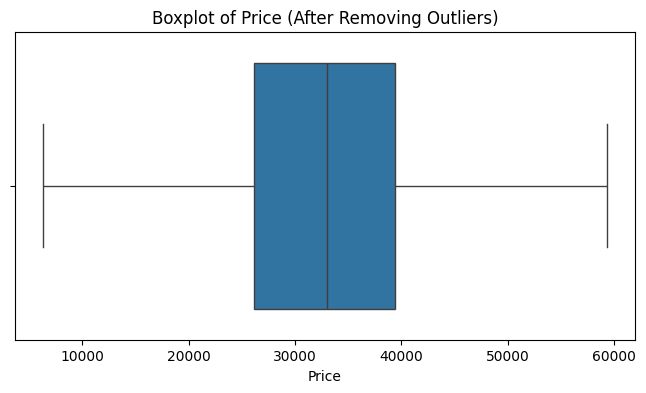

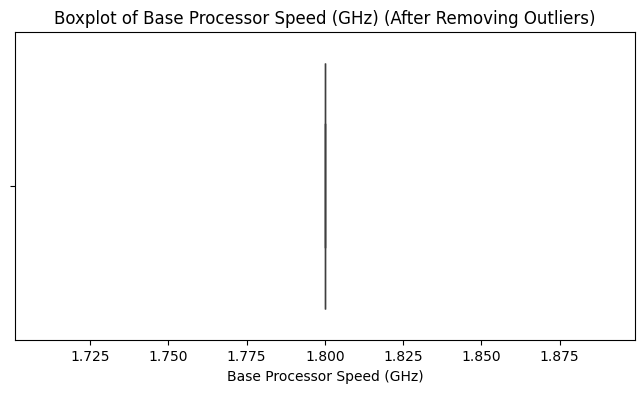

In [ ]:
# Plot boxplots after outlier removal
for col in ['Price', 'Base Processor Speed (GHz)']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col} (After Removing Outliers)")
        plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Helper functions (with default fallback values) ---

def parse_storage(val):
    if isinstance(val, str):
        val = val.strip()
        if 'TB' in val:
            return int(float(val.replace('TB', '').strip()) * 1024)
        elif 'GB' in val:
            return int(val.replace('GB', '').strip())
    return 0  # Default to 0 if not parsable

def parse_ram(val):
    if isinstance(val, str) and 'GB' in val:
        return int(val.replace('GB', '').strip())
    return 0  # Default to 0

def parse_gpu_memory(val):
    if isinstance(val, str):
        if 'Shared' in val or 'Unknown' in val:
            return 0
        elif 'GB' in val:
            try:
                return int(val.split()[0])
            except:
                return 0
    return 0

def parse_screen_size(val):
    try:
        return float(str(val).split()[0])
    except:
        return 0.0  # Default to 0.0 if not parsable

# --- Preprocessing columns individually (with NaN handling) ---

df['SSD Capacity'] = df['SSD Capacity'].apply(parse_storage)
df['RAM (System Memory)'] = df['RAM (System Memory)'].apply(parse_ram)
df['Graphics Card Capacity'] = df['Graphics Card Capacity'].apply(parse_storage)
df['GPU Memory'] = df['GPU Memory'].apply(parse_gpu_memory)
df['Maximum Expandable Memory'] = df['Maximum Expandable Memory'].apply(parse_ram)
df['Screen Size'] = df['Screen Size'].apply(parse_screen_size)

# Convert to numeric, fallback to 0 if parsing fails
df['Processor Core Count'] = pd.to_numeric(df['Processor Core Count'], errors='coerce').fillna(0).astype(int)
df['Processor Generation'] = df['Processor Generation'].str.extract(r'(\d+)')
df['Processor Generation'] = pd.to_numeric(df['Processor Generation'], errors='coerce').fillna(0).astype(int)

# For multilabel: convert "USB, HDMI" → ['USB', 'HDMI']
df['Connections'] = df['Connections'].fillna('Unknown').apply(
    lambda x: [i.strip() for i in str(x).split('to')[-1].split(',')] if isinstance(x, str) else []
)

# Define categorical and numeric columns
categorical_columns = ['Brand', 'Processor Type', 'Operating System', 'Graphics Card', 'Graphics Card Memory Type',
                       'Graphics Card Type', 'Warranty Type', 'RAM (System Memory) Type', 'Processor Model',
                       'Usage Purpose']

numeric_columns = ['SSD Capacity', 'RAM (System Memory)', 'Graphics Card Capacity', 'Processor Core Count',
                   'Processor Generation', 'GPU Memory', 'Screen Size', 'Maximum Expandable Memory']

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply transformations
processed_data = preprocessor.fit_transform(df)

# Apply MultiLabelBinarizer to the 'Connections' column
mlb = MultiLabelBinarizer()
connections_encoded = pd.DataFrame(mlb.fit_transform(df['Connections']), columns=mlb.classes_)

# Combine numeric and categorical transformations with the connections_encoded DataFrame
encoded_feature_names = (
    preprocessor.named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_columns)
)

X_final = pd.DataFrame(processed_data, columns=numeric_columns + list(encoded_feature_names))
X_final = pd.concat([X_final, connections_encoded.reset_index(drop=True)], axis=1)

# Final check
print(X_final.isna().sum())  # Should show all zeros
print(X_final.head())


SSD Capacity              0
RAM (System Memory)       0
Graphics Card Capacity    0
Processor Core Count      0
Processor Generation      0
                         ..
Kablo                     0
USB                       0
VGA                       0
Wi-Fi                     0
oth                       0
Length: 248, dtype: int64
   SSD Capacity  RAM (System Memory)  Graphics Card Capacity  \
0     -0.911123            -0.694251               -0.399614   
1     -0.911123            -0.694251               -0.609583   
2     -0.911123            -0.694251               -0.399614   
3     -1.072013             0.137064               -0.609583   
4     -0.911123            -0.694251               -0.399614   

   Processor Core Count  Processor Generation  GPU Memory  Screen Size  \
0             -0.518841             -2.546034    0.332481     0.136952   
1             -0.518841             -2.546034    0.332481     0.299386   
2             -0.518841             -2.229544    0.332481  

In [ ]:
# Ready for modeling
X_final.head()


,SSD Capacity,RAM (System Memory),Graphics Card Capacity,Processor Core Count,Processor Generation,GPU Memory,Screen Size,Maximum Expandable Memory,Brand_ACER,Brand_ARTITEKNIKPC,...,Usage Purpose_Home - School,Usage Purpose_Office - Work,DVI,Display Port,HDMI,Kablo,USB,VGA,Wi-Fi,oth
0,-0.911123,-0.694251,-0.399614,-0.518841,-2.546034,0.332481,0.136952,0.234991,0.0,0.0,...,0.0,1.0,0,0,0,0,1,0,0,0
1,-0.911123,-0.694251,-0.609583,-0.518841,-2.546034,0.332481,0.299386,0.234991,0.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0,0
2,-0.911123,-0.694251,-0.399614,-0.518841,-2.229544,0.332481,0.136952,0.234991,0.0,0.0,...,0.0,1.0,0,0,0,0,1,0,0,0
3,-1.072013,0.137064,-0.609583,-0.284648,0.302378,2.255646,0.299386,0.234991,0.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0,0
4,-0.911123,-0.694251,-0.399614,-0.518841,-2.229544,0.332481,0.136952,0.234991,0.0,0.0,...,0.0,1.0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Example: Let's say you're predicting "Price"
y = df['Price']   # or any other target variable
X = X_final        # Preprocessed feature data

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # or Classifier for classification

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 11798427.2306756
R2 Score: 0.919807398421276


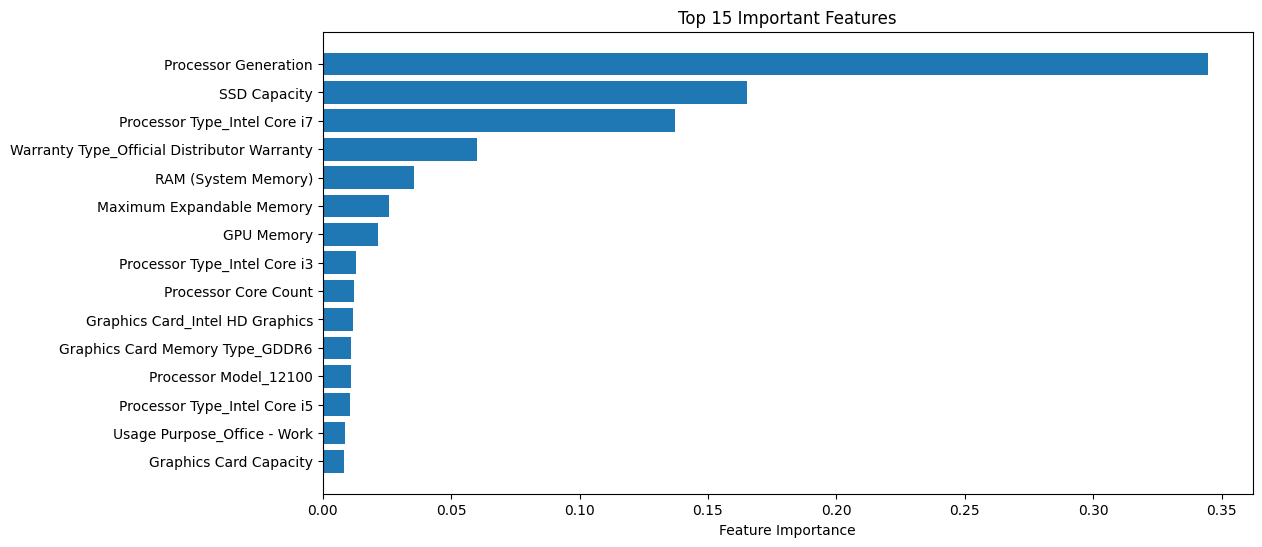

In [ ]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = X.columns

sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx[:15])), importances[sorted_idx[:15]])
plt.yticks(range(len(sorted_idx[:15])), feature_names[sorted_idx[:15]])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import joblib
joblib.dump(model, '../model/', 'laptop_price_model.pkl')


['laptop_price_model.pkl']

In [ ]:

data = {}
for col in df.columns:
  if col != "Price":
    print(f"\n--- Column: {col} ---")
    unique = []
    for i in df[col]:
        if i not in unique:
            unique.append(i)
    data[col] = unique
    print(f"Unique values: {unique}")
data_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in data.items()])) # Create a DataFrame from dictionary, allowing for varying lengths
data_df.to_csv('../data/uniqueng.csv', index=False) # Save to CSV, optionally excluding index


--- Column: Brand ---
Unique values: ['XASER', 'DMC', 'Zeiron', 'jetucuzal', 'Life Technology', 'IZOLY', 'TURBOX', 'Super', 'RAMTECH', 'Gamepage', 'Apple', 'GAMELINE', 'MSI', 'METSA', 'PCDEPO', 'Quantum Gaming', 'Canar', 'Gigabyte', 'ROGAME', 'LENOVO', 'EFS TECHNOLOGY', 'HP', 'OEM', 'ASUS', 'OXpower', 'ARTITEKNIKPC', 'Assembly', 'Güneysu Gaming', 'CASPER', 'UCARTECH', 'Technopc', 'DAGMOR', 'WARBOX', 'Avantron', 'Revenge', 'ColdPower', 'SECLIFE', 'TRINITY', 'Zetta', 'Corsair', 'RaXius', 'Oksid Information Technology', 'Tiwox', 'Jedi', 'Dell', 'Quadro', 'Rexdragon', 'Grundig', 'Redrock', 'Gaming Game', 'ACER', 'Tiranozor']

--- Column: Processor Type ---
Unique values: ['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Ryzen 9', 'M2', 'Apple M1', 'Intel Pentium', 'AMD Ryzen 7', 'Intel Xeon', 'Intel Core i9', 'AMD Ryzen 3']

--- Column: SSD Capacity ---
Unique values: [512, 256, 4096, 240, 1024, 128, 0, 500, 480, 250, 32, 8, 2048, 120]

--- Column: RAM (System

In [ ]:

for col in df.columns:
    print(f"\n--- Column: {col} ---")
    print(df[col].describe(include='all'))
    print("Missing Values:", df[col].isnull().sum())



--- Column: Brand ---
count     2467
unique      52
top       ACER
freq       964
Name: Brand, dtype: object
Missing Values: 0

--- Column: Price ---
count     2467.000000
mean     32194.862075
std      12373.331280
min       6331.847500
25%      26188.060000
50%      33016.470000
75%      39425.535000
max      59281.747500
Name: Price, dtype: float64
Missing Values: 0

--- Column: Processor Type ---
count              2467
unique               13
top       Intel Core i5
freq               1543
Name: Processor Type, dtype: object
Missing Values: 0

--- Column: SSD Capacity ---
count    2467.000000
mean     1961.731658
std      1591.470352
min         0.000000
25%       512.000000
50%      1024.000000
75%      4096.000000
max      4096.000000
Name: SSD Capacity, dtype: float64
Missing Values: 0

--- Column: RAM (System Memory) ---
count    2467.000000
mean       29.361978
std        19.250512
min         4.000000
25%        16.000000
50%        24.000000
75%        40.000000
max       

In [ ]:
from joblib import dump
from google.colab import drive

# Mount Google Drive properly
drive.mount('/content/drive', force_remount=True)

# Save to a specific directory in Drive
save_path = '/../models/'

# Create directory if it doesn't exist
!mkdir -p "{save_path}"

# Save artifacts with compression
dump(model, save_path + 'laptop_price_model.pkl', compress=3)
dump(preprocessor, save_path + 'preprocessor.joblib', compress=3)
dump(mlb, save_path + 'multilabel_binarizer.joblib', compress=3)
dump(X_final.columns, save_path + 'feature_columns.joblib', compress=3)

print("Files saved successfully at:", save_path)

Mounted at /content/drive
Files saved successfully at: /content/drive/My Drive/Colab Notebooks/saved_models/


#NoteBook End
